In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('bestsellers with categories.csv')

# Display the first five rows of the dataset
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
# Display statistical summary
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
# Shape of the dataset (rows, columns)
df.shape

(550, 7)

In [6]:
# Check for missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
# Count of unique book names
len(df.Name.unique())

351

In [8]:
# Rename columns for consistency
df.columns=['name','author','user_rating','reviews','price','year','genre']

In [9]:
# Add a new column for estimated profit
df['estimated_profit']=df.reviews*df.price

In [10]:
# Set visual styling for plots
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Genre Analysis
## Analyze the distribution of genres

In [12]:
# Filter data for Fiction and Non-Fiction
genre_dist = df.genre.value_counts()
genre_dist

genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

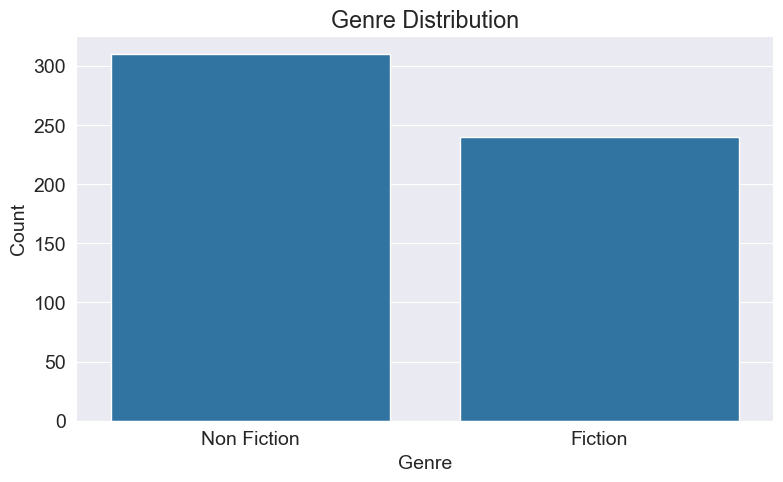

In [13]:
# Barplot of genre distribution
sns.barplot(x=genre_dist.index, y=genre_dist);
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

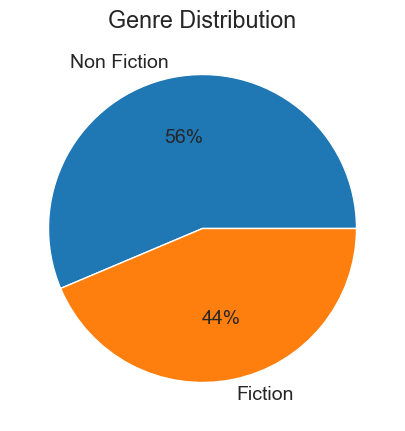

In [14]:
# Pie chart of genre distribution
plt.pie(genre_dist, labels=genre_dist.index, autopct='%.0f%%');
plt.title("Genre Distribution")
plt.show()

# User Ratings Overview

In [16]:
# Average rating for each genre
df.groupby('genre')['user_rating'].mean()

genre
Fiction        4.648333
Non Fiction    4.595161
Name: user_rating, dtype: float64

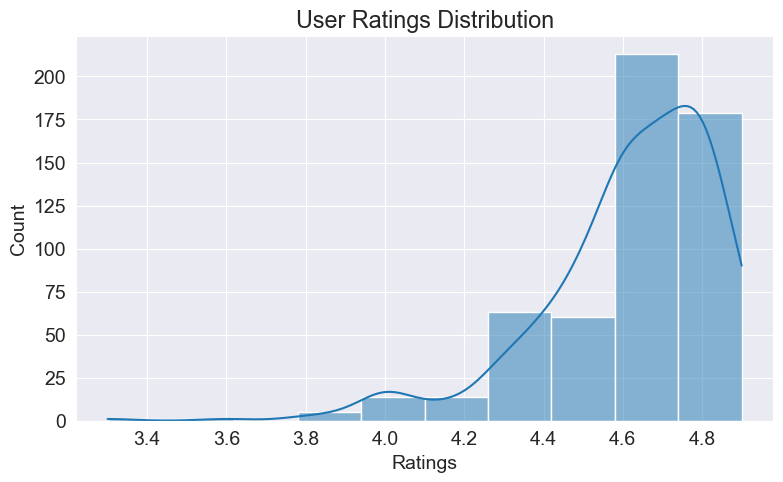

In [17]:
# Histogram of user ratings
sns.histplot(data=df.user_rating, bins=10, kde=True)
plt.xlabel("Ratings")
plt.title("User Ratings Distribution")
plt.show()

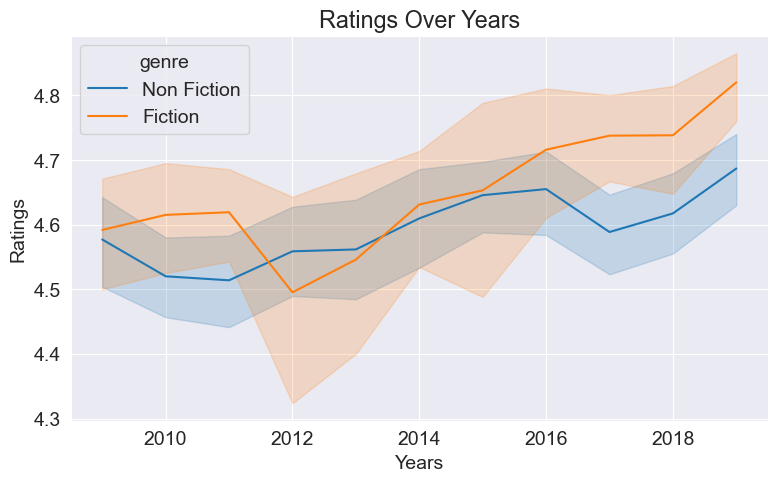

In [18]:
# Lineplot showing user ratings over the years, split by genre
sns.lineplot(data=df, x='year', y='user_rating', hue='genre')
plt.xlabel("Years")
plt.ylabel("Ratings")
plt.title("Ratings Over Years")
plt.show()

# Relationship Between Ratings and Price

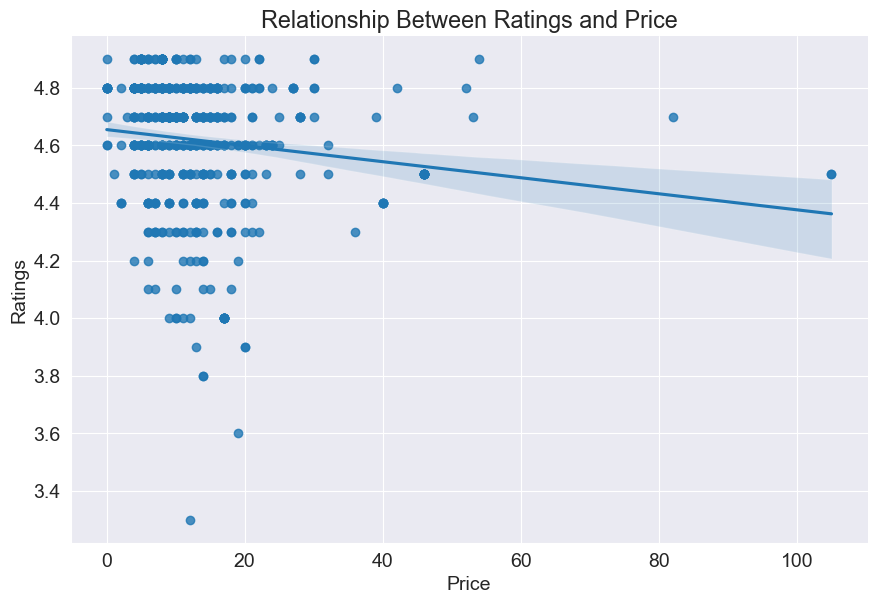

In [20]:
# Scatter plot with regression line
sns.lmplot(y='user_rating', x='price', data=df, aspect=1.5, height=6)
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.title('Relationship Between Ratings and Price')
plt.show()

# Yearly Earnings Analysis

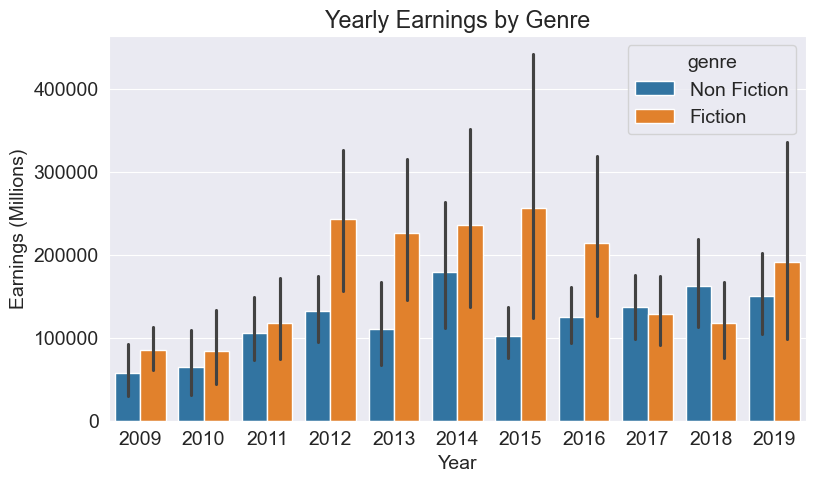

In [22]:
# Barplot of yearly estimated profits by genre
sns.barplot(x='year', y='estimated_profit', hue='genre', data=df)
plt.xlabel('Year')
plt.ylabel("Earnings (Millions)")
plt.title('Yearly Earnings by Genre')
plt.show()

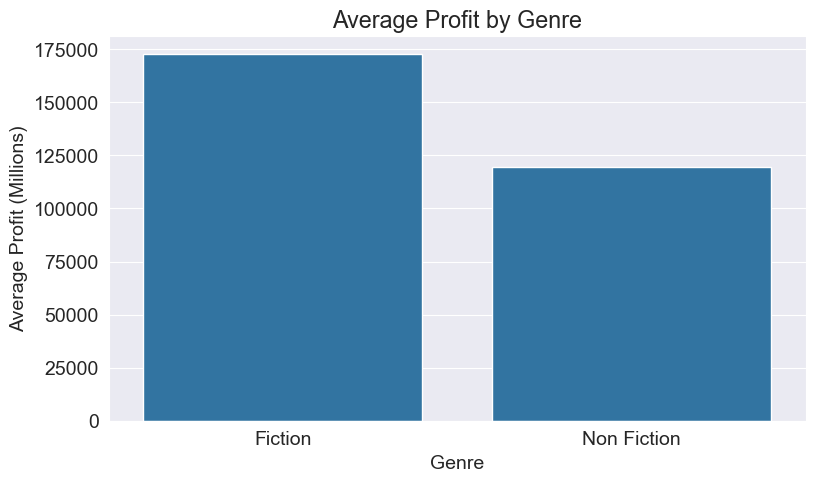

In [23]:
# Average profit per genre
genre_average = df.groupby(['genre'])['estimated_profit'].mean()
sns.barplot(x=genre_average.index, y=genre_average)
plt.xlabel("Genre")
plt.ylabel("Average Profit (Millions)")
plt.title("Average Profit by Genre")
plt.show()

# Top Performers

In [25]:
# Top 10 books by estimated profit
rich_df = df.groupby('name')['estimated_profit'].max().sort_values(ascending=False).head(10)
rich_df

name
The Girl on the Train                                                                                 1430028
The Alchemist                                                                                         1396161
Where the Crawdads Sing                                                                               1317615
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                              701295
Harry Potter Paperback Box Set (Books 1-7)                                                             700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                    676880
Becoming                                                                                               672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)               661710
The Fault in Our Stars                                                                                 656266
A Gam

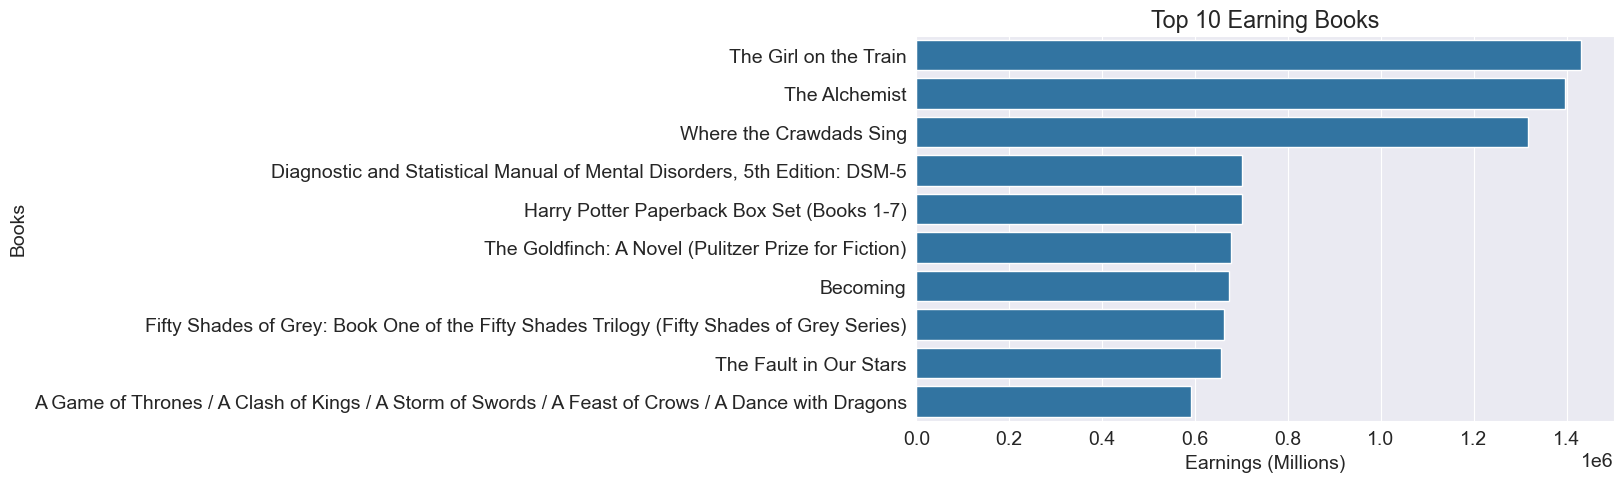

In [26]:
# Barplot for top 10 books
sns.barplot(x=rich_df, y=rich_df.index)
plt.xlabel("Earnings (Millions)")
plt.ylabel("Books")
plt.title("Top 10 Earning Books")
plt.show()

In [27]:
# Most earning book per year
most_earning_book_per_year = df[df.groupby('year')['estimated_profit'].transform(max) == df['estimated_profit']]
most_earning_book_per_year = most_earning_book_per_year.sort_values('year').set_index('year')
most_earning_book_per_year

C:\Users\Hp\AppData\Local\Temp\ipykernel_13692\69618163.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_earning_book_per_year = df[df.groupby('year')['estimated_profit'].transform(max) == df['estimated_profit']]


,name,author,user_rating,reviews,price,genre,estimated_profit
year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730


# Average Earning Per Genre Per Year

In [29]:
# Average earning per year for each genre
genres_per_year_mean = df.groupby(['year', 'genre'])['estimated_profit'].mean().round(2)
pd.DataFrame(genres_per_year_mean)

estimated_profit
year genre                        
2009 Fiction              85776.79
     Non Fiction          58024.58
2010 Fiction              84522.00
     Non Fiction          64335.63
2011 Fiction             117434.67
     Non Fiction         106295.21
2012 Fiction             242780.67
     Non Fiction         132104.31
2013 Fiction             226853.71
     Non Fiction         110657.31
2014 Fiction             236487.86
     Non Fiction         179397.71
2015 Fiction             256752.82
     Non Fiction         102435.36
2016 Fiction             213931.84
     Non Fiction         125381.45
2017 Fiction             129188.17
     Non Fiction         137256.88
2018 Fiction             117636.00
     Non Fiction         162524.79
2019 Fiction             191812.50
     Non Fiction         150023.50

# Trend of Earnings Over the Years

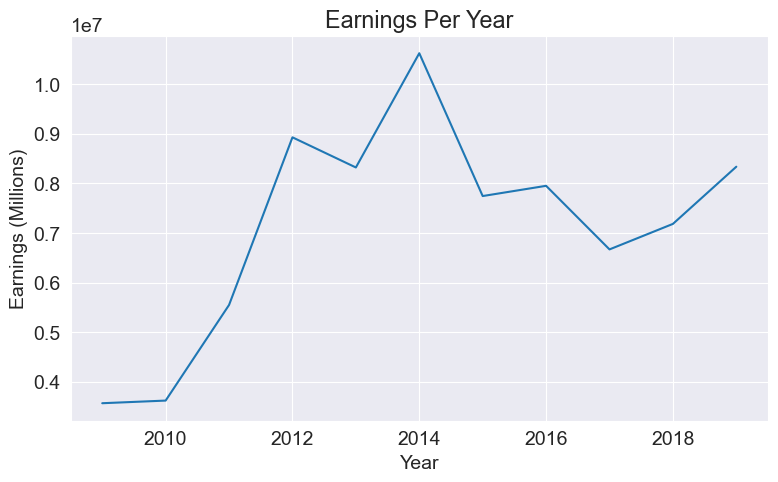

In [31]:
# Lineplot of total yearly earnings
earning_graph = df.groupby('year')['estimated_profit'].sum()
sns.lineplot(data=earning_graph)
plt.xlabel('Year')
plt.ylabel("Earnings (Millions)")
plt.title("Earnings Per Year")
plt.show()

# Top Authors

In [33]:
# Top 5 earning authors
authors = df.groupby('author')['estimated_profit'].sum().sort_values(ascending=False).head(5)
authors

author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Name: estimated_profit, dtype: int64

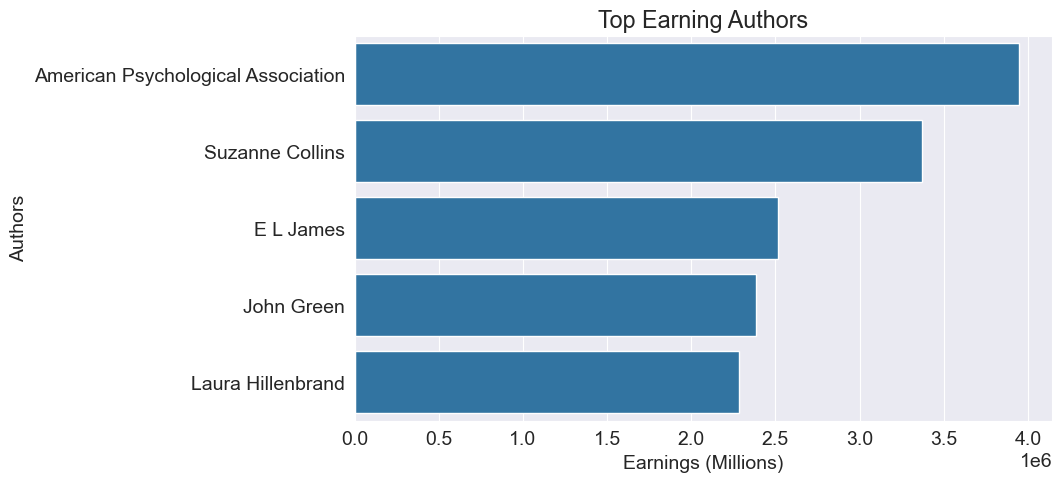

In [34]:
# Barplot for top authors
sns.barplot(y=authors.index, x=authors)
plt.xlabel("Earnings (Millions)")
plt.ylabel("Authors")
plt.title('Top Earning Authors')
plt.show()